<a href="https://colab.research.google.com/github/DelfonteSimone/MLPNS2021_Delfonte/blob/main/GG/MIDTERM_second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# these are all the packages I used. But depending on your choices you may need more or other ones. That is ok!

import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
from sklearn.cluster  import KMeans
import scipy.optimize


pl.rcParams['font.size'] = 18

In [2]:
from google.colab import drive
drive.mount('/MyDrive')

Drive already mounted at /MyDrive; to attempt to forcibly remount, call drive.mount("/MyDrive", force_remount=True).


In [3]:
cd /MyDrive/MyDrive

/MyDrive/MyDrive


In [4]:
datain=pd.read_excel("country_pop.xls")
datain.head

<bound method NDFrame.head of            Data Source World Development Indicators  ... Unnamed: 63 Unnamed: 64
0    Last Updated Date          2021-03-19 00:00:00  ...         NaN         NaN
1                  NaN                          NaN  ...         NaN         NaN
2         Country Name                 Country Code  ...      2019.0      2020.0
3                Aruba                          ABW  ...    106314.0         NaN
4          Afghanistan                          AFG  ...  38041754.0         NaN
..                 ...                          ...  ...         ...         ...
262             Kosovo                          XKX  ...   1794248.0         NaN
263        Yemen, Rep.                          YEM  ...  29161922.0         NaN
264       South Africa                          ZAF  ...  58558270.0         NaN
265             Zambia                          ZMB  ...  17861030.0         NaN
266           Zimbabwe                          ZWE  ...  14645468.0         Na

In [5]:
datain.iloc[:,0]


0      Last Updated Date
1                    NaN
2           Country Name
3                  Aruba
4            Afghanistan
             ...        
262               Kosovo
263          Yemen, Rep.
264         South Africa
265               Zambia
266             Zimbabwe
Name: Data Source, Length: 267, dtype: object

In [6]:
datain.iloc[0,:]

Data Source                       Last Updated Date
World Development Indicators    2021-03-19 00:00:00
Unnamed: 2                                      NaN
Unnamed: 3                                      NaN
Unnamed: 4                                      NaN
                                       ...         
Unnamed: 60                                     NaN
Unnamed: 61                                     NaN
Unnamed: 62                                     NaN
Unnamed: 63                                     NaN
Unnamed: 64                                     NaN
Name: 0, Length: 65, dtype: object

OSSERVANDO I DATI SI NOTACHE LA RIGA 2 CONTIENE LE DATE IN CUI SONO STATE OSSERVATE LE POPOLAZIONI.
LA RIGA 0 NON CONTIENE OSSERVAZIONI E NEMMENO LA 1 QINDI LE POSSO TOGLIERE

In [7]:
years = datain.loc[2]
years = years.drop(['Data Source', 'World Development Indicators', 'Unnamed: 2','Unnamed: 3'])
years =years.drop(['Unnamed: 64'])
len(years)

60

In [8]:
datain.drop([2])
dataclean = datain.drop(['Data Source','World Development Indicators','Unnamed: 2','Unnamed: 3'],axis=1)
datacleans = dataclean.drop([0,1,2,])
datacleans = datacleans.drop(['Unnamed: 64'], axis=1)
datacleans


,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
3,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
4,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
5,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
6,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
7,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000

In [9]:
datain.iloc[3,0]
#i nomi degli stati in cui si sono osseervate le crescite dipopolazione sono la colonna zero dalla riga 3 in poi compresa

'Aruba'

In [13]:
popmes = {}
for t in range(0,264-3):
 popmes[datain.iloc[t+3,0]] = datacleans.loc[t+3]
 

In [17]:
#creo un dizionario nel quale piazzare le misure attraverso un indice numerico
popnum = {}
for t in range(0,264-3):
  popnum[t] = datacleans.loc[t+3]
  

In [19]:
popnum.keys() , popmes.keys()

(dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

ValueError: ignored

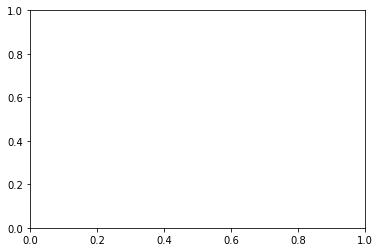

In [12]:
#ciclo per plottare i risultati
for t in range(0,62):
 pl.plot(years,popmes[t])